# Trump's tone before and after the elections

We're going to reproduce [Trump Sounds a Different Tone in First Address to Congress](https://www.nytimes.com/interactive/2017/02/28/upshot/trump-sounds-different-tone-in-first-address-to-congress.html) from the Upshot.

**Datasource 1:** The [NRC Emotional Lexicon](http://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm), a list of English words and their associations with eight basic emotions (anger, fear, anticipation, trust, surprise, sadness, joy, and disgust) and two sentiments (negative and positive). The annotations were manually done by crowdsourcing. 

**Datasource 2:** Speeches from White House https://www.whitehouse.gov/the-press-office/

**Datasource 3:** Election Speeches taken from  the website Presidency. Scraped Trump 2016: http://www.presidency.ucsb.edu/2016_election_speeches.php?candidate=45&campaign=2016TRUMP&doctype=5000

In [26]:
import pandas as pd
%matplotlib inline
from dirtyclean import clean

# Reading in the EmoLex

I'm just copying this from the other notebook! It's the one at the very bottom that does a lot of reshaping. I think it's the easiest to work with.

In [27]:
filepath = "NRC-Emotion-Lexicon-v0.92/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


## Reading in Trump's speeches

### Get a list of all of the files

In [28]:
filenames = pd.read_csv("trump_presidency.csv")


In [29]:
filenames.head()

,actual_president_guess,content,date,president,title,url
0,True,trump national golf club bedminster new jersey...,2017-08-08 17:55:00-04:00,Trump,Remarks by President Trump Before a Briefing o...,https://www.whitehouse.gov/the-press-office/20...
1,True,the president s weekly address is now availabl...,2017-08-04 20:39:00-04:00,Trump,President Donald J. Trump’s Weekly Address | w...,https://www.whitehouse.gov/the-press-office/20...
2,True,fema headquarters washington d c a m edt the p...,2017-08-04 12:15:07-04:00,Trump,Remarks by President Trump at FEMA Headquarter...,https://www.whitehouse.gov/the-press-office/20...
3,True,roosevelt room a m edt the president good morn...,2017-08-03 12:41:00-04:00,Trump,Remarks by President Trump at Department of Ve...,https://www.whitehouse.gov/the-press-office/20...
4,True,roosevelt room a m edt the president thank you...,2017-08-02 12:57:00-04:00,Trump,"Remarks by President Trump, Senator Tom Cotton...",https://www.whitehouse.gov/the-press-office/20...


In [30]:
filenames

,actual_president_guess,content,date,president,title,url
0,True,trump national golf club bedminster new jersey...,2017-08-08 17:55:00-04:00,Trump,Remarks by President Trump Before a Briefing o...,https://www.whitehouse.gov/the-press-office/20...
1,True,the president s weekly address is now availabl...,2017-08-04 20:39:00-04:00,Trump,President Donald J. Trump’s Weekly Address | w...,https://www.whitehouse.gov/the-press-office/20...
2,True,fema headquarters washington d c a m edt the p...,2017-08-04 12:15:07-04:00,Trump,Remarks by President Trump at FEMA Headquarter...,https://www.whitehouse.gov/the-press-office/20...
3,True,roosevelt room a m edt the president good morn...,2017-08-03 12:41:00-04:00,Trump,Remarks by President Trump at Department of Ve...,https://www.whitehouse.gov/the-press-office/20...
4,True,roosevelt room a m edt the president thank you...,2017-08-02 12:57:00-04:00,Trump,"Remarks by President Trump, Senator Tom Cotton...",https://www.whitehouse.gov/the-press-office/20...
5,True,east room p m edt the president thank you very...,2017-07-31 16:52:00-04:00,Trump,Remarks by President Trump at Presentation of ...,https://www.whitehouse.gov/the-press-office/20...
6,True,cabinet room a m edt the president good mornin...,2017-07-31 10:48:00-04:00,Trump,Remarks by President Trump in Cabinet Meeting ...,https://www.whitehouse.gov/the-press-office/20...
7,True,oval office a m edt the president we just swor...,2017-07-31 10:40:00-04:00,Trump,Remarks by President Trump After Swearing In G...,https://www.whitehouse.gov/the-press-office/20...
8,True,van nostrand theatre ronkonkoma new york p m e...,2017-07-28 15:46:00-04:00,Trump,Remarks by President Trump to Law Enforcement ...,https://www.whitehouse.gov/the-press-office/20...
9,True,the president s weekly address is now availabl...,2017-07-28 14:55:27-04:00,Trump,President Donald J. Trump’s Weekly Address | w...,https://www.whitehouse.gov/the-press-office/20...


In [31]:
speeches_df = filenames

In [32]:
#speeches_df = filenames.T.reset_index().rename(columns={'index': 'name'})
#speeches_df.head()

In [33]:
speeches_df.columns = ['nothing', 'content', 'date', 'president', 'filename', 'url']
speeches_df

,nothing,content,date,president,filename,url
0,True,trump national golf club bedminster new jersey...,2017-08-08 17:55:00-04:00,Trump,Remarks by President Trump Before a Briefing o...,https://www.whitehouse.gov/the-press-office/20...
1,True,the president s weekly address is now availabl...,2017-08-04 20:39:00-04:00,Trump,President Donald J. Trump’s Weekly Address | w...,https://www.whitehouse.gov/the-press-office/20...
2,True,fema headquarters washington d c a m edt the p...,2017-08-04 12:15:07-04:00,Trump,Remarks by President Trump at FEMA Headquarter...,https://www.whitehouse.gov/the-press-office/20...
3,True,roosevelt room a m edt the president good morn...,2017-08-03 12:41:00-04:00,Trump,Remarks by President Trump at Department of Ve...,https://www.whitehouse.gov/the-press-office/20...
4,True,roosevelt room a m edt the president thank you...,2017-08-02 12:57:00-04:00,Trump,"Remarks by President Trump, Senator Tom Cotton...",https://www.whitehouse.gov/the-press-office/20...
5,True,east room p m edt the president thank you very...,2017-07-31 16:52:00-04:00,Trump,Remarks by President Trump at Presentation of ...,https://www.whitehouse.gov/the-press-office/20...
6,True,cabinet room a m edt the president good mornin...,2017-07-31 10:48:00-04:00,Trump,Remarks by President Trump in Cabinet Meeting ...,https://www.whitehouse.gov/the-press-office/20...
7,True,oval office a m edt the president we just swor...,2017-07-31 10:40:00-04:00,Trump,Remarks by President Trump After Swearing In G...,https://www.whitehouse.gov/the-press-office/20...
8,True,van nostrand theatre ronkonkoma new york p m e...,2017-07-28 15:46:00-04:00,Trump,Remarks by President Trump to Law Enforcement ...,https://www.whitehouse.gov/the-press-office/20...
9,True,the president s weekly address is now availabl...,2017-07-28 14:55:27-04:00,Trump,President Donald J. Trump’s Weekly Address | w...,https://www.whitehouse.gov/the-press-office/20...


In [34]:
emolex_df['word'].head(3)

0      aback
1     abacus
2    abandon
Name: word, dtype: object

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(speeches_df['content'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# wordcount_df.sort_values(by='america', ascending=False).head(5)

In [37]:
# wordcount_df[['murder', 'america', 'great', 'prison', 'immigrant']].head(2)

In [38]:
# bad bad bad = 100% negative
# bad bad evil evil = 50% bad + 50% evil = 100% negative
# bad fish evil fish = 25% bad + 25% evil = 50% negative 
# awful % + hate % + bad % + worse % + evil % = negative %

wordcount_df[['awful', 'hate', 'bad', 'worse', 'evil']].sum(axis=1)

0      0.012739
1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
6      0.000000
7      0.000000
8      0.009070
9      0.000000
10     0.002364
11     0.000000
12     0.000000
13     0.005634
14     0.000000
15     0.003257
16     0.000000
17     0.002028
18     0.000000
19     0.003766
20     0.000000
21     0.003731
22     0.006803
23     0.000000
24     0.000489
25     0.000000
26     0.000000
27     0.002309
28     0.000000
29     0.000000
         ...   
191    0.000000
192    0.000000
193    0.000000
194    0.003559
195    0.000000
196    0.000000
197    0.000000
198    0.000000
199    0.003567
200    0.000000
201    0.000000
202    0.001050
203    0.000000
204    0.008895
205    0.000000
206    0.000000
207    0.006831
208    0.005984
209    0.000000
210    0.000000
211    0.000000
212    0.000000
213    0.000000
214    0.005208
215    0.000000
216    0.005291
217    0.000000
218    0.000000
219    0.000000
220    0.008913
Length: 221, dtype: floa

In [39]:
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


In [40]:
emolex_df[emolex_df.anger == 1].head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0
17,abhor,1,0,1,1,0,1,0,0,0,0
18,abhorrent,1,0,1,1,0,1,0,0,0,0
27,abolish,1,0,0,0,0,1,0,0,0,0


In [41]:
# Get your list of angry words
angry_words = emolex_df[emolex_df.anger == 1]['word']
angry_words.head()

3       abandoned
4     abandonment
17          abhor
18      abhorrent
27        abolish
Name: word, dtype: object

In [42]:
wordcount_df[angry_words].head()

,abandoned,abandonment,abhor,abhorrent,abolish,abomination,abuse,accursed,accusation,accused,...,wreck,wrecked,wretch,wring,wrongdoing,wrongful,wrongly,yell,yelp,youth
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019108
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [43]:
# Only give me the columns of angry words
speeches_df['anger'] = wordcount_df[angry_words].sum(axis=1)
speeches_df.head(3)

,nothing,content,date,president,filename,url,anger
0,True,trump national golf club bedminster new jersey...,2017-08-08 17:55:00-04:00,Trump,Remarks by President Trump Before a Briefing o...,https://www.whitehouse.gov/the-press-office/20...,0.165605
1,True,the president s weekly address is now availabl...,2017-08-04 20:39:00-04:00,Trump,President Donald J. Trump’s Weekly Address | w...,https://www.whitehouse.gov/the-press-office/20...,0.000000
2,True,fema headquarters washington d c a m edt the p...,2017-08-04 12:15:07-04:00,Trump,Remarks by President Trump at FEMA Headquarter...,https://www.whitehouse.gov/the-press-office/20...,0.000000


In [44]:
# Get your list of positive words
positive_words = emolex_df[emolex_df.positive == 1]['word']


# Get your list of sadness words
sadness_words = emolex_df[emolex_df.sadness == 1]['word']
sadness_words.head()

# Get your list of surprise words
surprise_words = emolex_df[emolex_df.surprise == 1]['word']
surprise_words.head()

# Get your list of disgust words
disgust_words = emolex_df[emolex_df.disgust == 1]['word']
#disgust_words.head()

# Get your list of anticipation words
anticipation_words = emolex_df[emolex_df.anticipation == 1]['word']
#anticipation_words.head()

# Get your list of negative words
negative_words = emolex_df[emolex_df.negative == 1]['word']
negative_words.head()


# Get your list of joy words
joy_words = emolex_df[emolex_df.joy == 1]['word']
joy_words.head()

# Get your list of trust words
trust_words = emolex_df[emolex_df.trust == 1]['word']
trust_words.head()


# Get your list of fear words
fear_words = emolex_df[emolex_df.fear == 1]['word']
fear_words.head()



2         abandon
3       abandoned
4     abandonment
13      abduction
17          abhor
Name: word, dtype: object

In [45]:
# Only give me the columns of angry words
speeches_df['positivity'] = wordcount_df[positive_words].sum(axis=1)


speeches_df['joy'] = wordcount_df[joy_words].sum(axis=1)


speeches_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)



speeches_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

speeches_df['trust'] = wordcount_df[trust_words].sum(axis=1)


speeches_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


speeches_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)


speeches_df['negative'] = wordcount_df[negative_words].sum(axis=1)


speeches_df['fear'] = wordcount_df[fear_words].sum(axis=1)




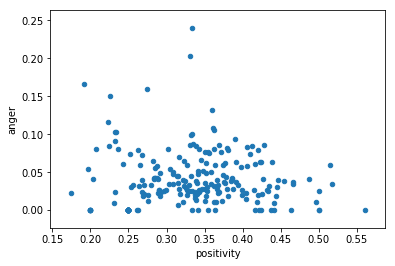

In [46]:
speeches_df.plot(x='positivity', y='anger', kind='scatter')

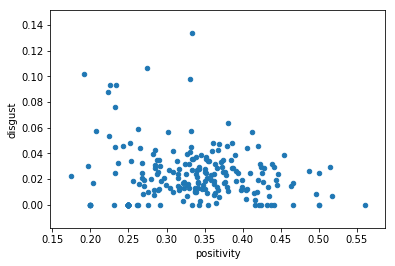

In [47]:
speeches_df.plot(x='positivity', y='disgust', kind='scatter')

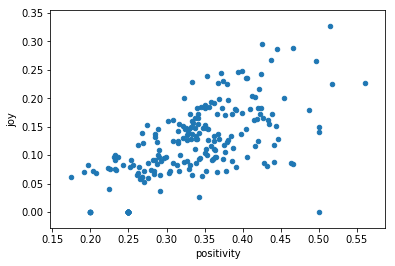

In [48]:
speeches_df.plot(x='positivity', y='joy', kind='scatter')

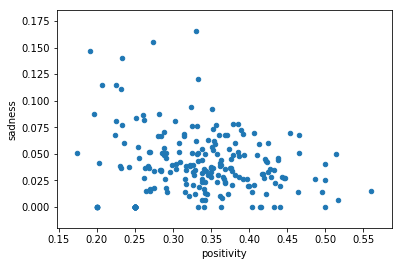

In [49]:
speeches_df.plot(x='positivity', y='sadness', kind='scatter')

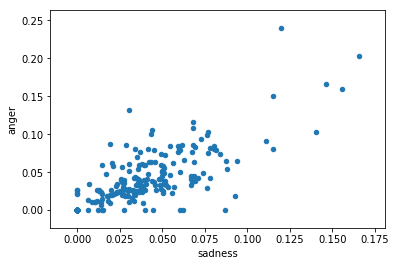

In [50]:
speeches_df.plot(x='sadness', y='anger', kind='scatter')

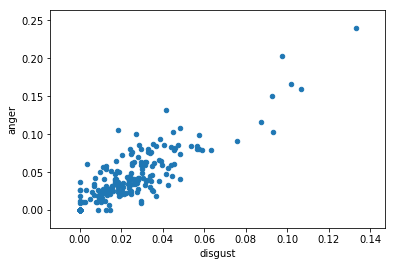

In [51]:
speeches_df.plot(x='disgust', y='anger', kind='scatter')

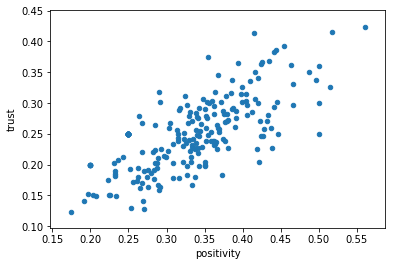

In [52]:
speeches_df.plot(x='positivity', y='trust', kind='scatter')

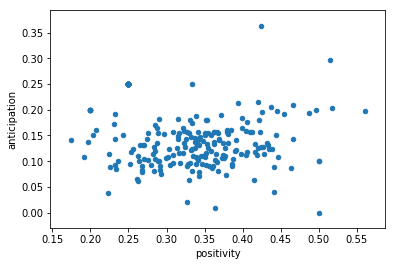

In [53]:
speeches_df.plot(x='positivity', y='anticipation', kind='scatter')

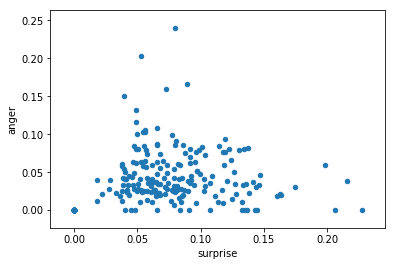

In [54]:
speeches_df.plot(x='surprise', y='anger', kind='scatter')

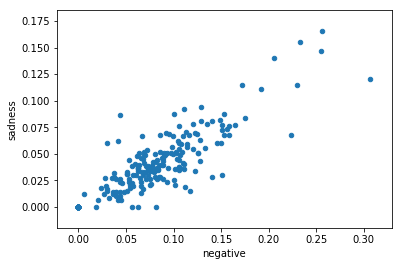

In [55]:
speeches_df.plot(x='negative', y='sadness', kind='scatter')

# Reading in the Trump election speeches



In [56]:
filenames1 = pd.read_csv("trump_elections.csv")

In [57]:
filenames1

,"Address Accepting the Presidential Nomination at the Republican National Convention in Cleveland, Ohio; July 21, 2016","Address to the National Guard Association of the United States 138th General Conference & Exhibition at the Baltimore Convention Center in Baltimore, Maryland; September 12, 2016","Excerpts of Remarks at Aaron Bessant Park in Panama City, Florida; October 11, 2016","News Conference in Doral, Florida; July 27, 2016","Remarks Announcing Candidacy for President in New York City; June 16, 2015","Remarks Introducing Governor Mike Pence as the 2016 Republican Vice Presidential Nominee in New York City; July 16, 2016","Remarks at Aston Community Center in Aston, Pennsylvania; September 13, 2016","Remarks at Erie Insurance Arena in Erie, Pennsylvania; August 12, 2016","Remarks at Great Faith International Ministries in Detroit, Michigan; September 3, 2016","Remarks at Henderson Pavilion in Henderson, Nevada; October 5, 2016",...,"Remarks in New York City Accepting Election as the 45th President of the United States; November 9, 2016","Remarks in Virginia Beach, Virginia; July 11, 2016","Remarks on Foreign Policy at the National Press Club in Washington, DC; April 27, 2016","Remarks on Immigration at the Phoenix Convention Center in Phoenix, Arizona; August 31, 2016","Remarks on Obamacare in Valley Forge, Pennsylvania; November 1, 2016","Remarks on Proposals for the First 100 Days in Office at the Eisenhower Complex in Gettysburg, Pennsylvania; October 22, 2016","Remarks to the 11th Annual Values Voter Summit in Washington, DC Omni Shoreham Hotel, Washington, D.C.; September 9, 2016","Remarks to the American Legion in Cincinnati, Ohio; September 1, 2016","Remarks to the Detroit Economic Club; August 8, 2016","Remarks to the Economic Club of New York at the Waldorf Astoria in New York City; September 15, 2016"
0,"July 21, 2016","September 12, 2016","October 11, 2016","July 27, 2016","June 16, 2015","July 16, 2016","September 13, 2016","August 12, 2016","September 3, 2016","October 5, 2016",...,"November 9, 2016","July 11, 2016","April 27, 2016","August 31, 2016","November 1, 2016","October 22, 2016","September 9, 2016","September 1, 2016","August 8, 2016","September 15, 2016"
1,"Friends, delegates and fellow Americans: I hum...",Thank you. I am honored to be here today. Let ...,The Hillary Clinton documents released by Wiki...,"Donald Trump. So, it's been 235 days since cro...",Trump: Wow. Whoa. That is some group of people...,"Thank you, everybody. Great honor. Great honor...","Thank you. I want to applaud my daughter, Ivan...","Thank you. Thank you, everybody. Thank you. Un...","""Thank you. That's so nice. Thank you.""Well, t...",Thank you. It is great to be here in the city ...,...,"Thank you. Thank you very much, everyone. [app...",Thank you.I'd like to thank Chairman Jeff Mill...,"Thank you for the opportunity to speak to you,...","Wow. Thank you. That's a lot of people, Phoeni...",Thank you very much. Thank you. [applause]I wo...,Thank you. [applause]Thank you very much thank...,"Thank you. Thank you very much. Oh, Jon. Jon i...",Thank you all so much. What an honor and a pri...,Thank you for the invitation to speak to you t...,Thank you for the opportunity to speak with yo...
2,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.p

In [58]:
president_speeches_df = filenames1.T.reset_index().rename(columns={'index': 'name'})
president_speeches_df.head()

,name,0,1,2
0,Address Accepting the Presidential Nomination ...,"July 21, 2016","Friends, delegates and fellow Americans: I hum...",http://www.presidency.ucsb.edu/ws/index.php?pi...
1,Address to the National Guard Association of t...,"September 12, 2016",Thank you. I am honored to be here today. Let ...,http://www.presidency.ucsb.edu/ws/index.php?pi...
2,Excerpts of Remarks at Aaron Bessant Park in P...,"October 11, 2016",The Hillary Clinton documents released by Wiki...,http://www.presidency.ucsb.edu/ws/index.php?pi...
3,"News Conference in Doral, Florida; July 27, 2016","July 27, 2016","Donald Trump. So, it's been 235 days since cro...",http://www.presidency.ucsb.edu/ws/index.php?pi...
4,Remarks Announcing Candidacy for President in ...,"June 16, 2015",Trump: Wow. Whoa. That is some group of people...,http://www.presidency.ucsb.edu/ws/index.php?pi...


In [59]:
president_speeches_df.columns = ['name', 'date', 'content', 'filename']
president_speeches_df.head()

,name,date,content,filename
0,Address Accepting the Presidential Nomination ...,"July 21, 2016","Friends, delegates and fellow Americans: I hum...",http://www.presidency.ucsb.edu/ws/index.php?pi...
1,Address to the National Guard Association of t...,"September 12, 2016",Thank you. I am honored to be here today. Let ...,http://www.presidency.ucsb.edu/ws/index.php?pi...
2,Excerpts of Remarks at Aaron Bessant Park in P...,"October 11, 2016",The Hillary Clinton documents released by Wiki...,http://www.presidency.ucsb.edu/ws/index.php?pi...
3,"News Conference in Doral, Florida; July 27, 2016","July 27, 2016","Donald Trump. So, it's been 235 days since cro...",http://www.presidency.ucsb.edu/ws/index.php?pi...
4,Remarks Announcing Candidacy for President in ...,"June 16, 2015",Trump: Wow. Whoa. That is some group of people...,http://www.presidency.ucsb.edu/ws/index.php?pi...


# How do the Election Speeches sound?

Let's analyze by counting words.

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(president_speeches_df['content'])
vocab = vec.get_feature_names()
president_speeches_df_wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
president_speeches_df_wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.000807,0.000807,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.002506,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000677,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
# Get your list of positive words
positive_words = emolex_df[emolex_df.positive == 1]['word']

# Only give me the columns of angry words
president_speeches_df['positivity'] = president_speeches_df_wordcount_df[positive_words].sum(axis=1)
president_speeches_df.head(3)

,name,date,content,filename,positivity
0,Address Accepting the Presidential Nomination ...,"July 21, 2016","Friends, delegates and fellow Americans: I hum...",http://www.presidency.ucsb.edu/ws/index.php?pi...,0.259080
1,Address to the National Guard Association of t...,"September 12, 2016",Thank you. I am honored to be here today. Let ...,http://www.presidency.ucsb.edu/ws/index.php?pi...,0.300752
2,Excerpts of Remarks at Aaron Bessant Park in P...,"October 11, 2016",The Hillary Clinton documents released by Wiki...,http://www.presidency.ucsb.edu/ws/index.php?pi...,0.185606


In [62]:
# Get your list of positive words
anger_words = emolex_df[emolex_df.anger == 1]['word']

# Only give me the columns of angry words
president_speeches_df['anger'] = president_speeches_df_wordcount_df[anger_words].sum(axis=1)
president_speeches_df.head(3)

,name,date,content,filename,positivity,anger
0,Address Accepting the Presidential Nomination ...,"July 21, 2016","Friends, delegates and fellow Americans: I hum...",http://www.presidency.ucsb.edu/ws/index.php?pi...,0.259080,0.105730
1,Address to the National Guard Association of t...,"September 12, 2016",Thank you. I am honored to be here today. Let ...,http://www.presidency.ucsb.edu/ws/index.php?pi...,0.300752,0.107769
2,Excerpts of Remarks at Aaron Bessant Park in P...,"October 11, 2016",The Hillary Clinton documents released by Wiki...,http://www.presidency.ucsb.edu/ws/index.php?pi...,0.185606,0.106061


In [63]:
# Only give me the columns of angry words
president_speeches_df['positivity'] = president_speeches_df_wordcount_df[positive_words].sum(axis=1)


president_speeches_df['joy'] = president_speeches_df_wordcount_df[joy_words].sum(axis=1)


president_speeches_df['disgust'] = president_speeches_df_wordcount_df[disgust_words].sum(axis=1)



president_speeches_df['surprise'] = president_speeches_df_wordcount_df[surprise_words].sum(axis=1)

president_speeches_df['trust'] = president_speeches_df_wordcount_df[trust_words].sum(axis=1)


president_speeches_df['anticipation'] = president_speeches_df_wordcount_df[anticipation_words].sum(axis=1)


president_speeches_df['sadness'] = president_speeches_df_wordcount_df[sadness_words].sum(axis=1)


president_speeches_df['negative'] = president_speeches_df_wordcount_df[negative_words].sum(axis=1)


president_speeches_df['fear'] = president_speeches_df_wordcount_df[fear_words].sum(axis=1)




# Comparing Election vs Presidency

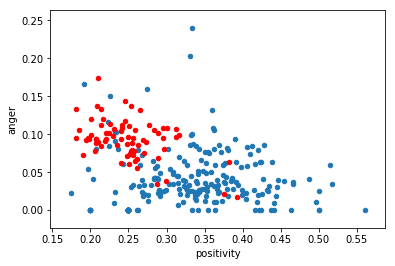

In [64]:
ax = speeches_df.plot(x='positivity', y= 'anger', kind='scatter')
president_speeches_df.plot(x='positivity', y= 'anger', kind='scatter', c='red', ax=ax)

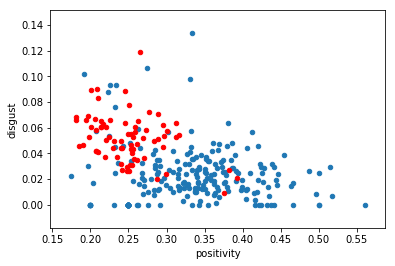

In [65]:
ax = speeches_df.plot(x='positivity', y='disgust', kind='scatter')
president_speeches_df.plot(x='positivity', y='disgust', kind='scatter', c='red', ax=ax)

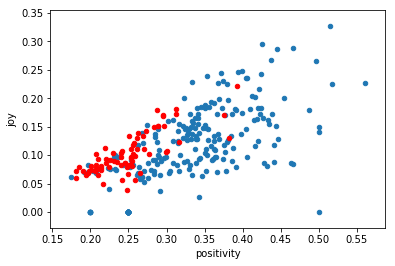

In [66]:
ax = speeches_df.plot(x='positivity', y='joy', kind='scatter')
president_speeches_df.plot(x='positivity', y='joy', kind='scatter', c='red', ax=ax)

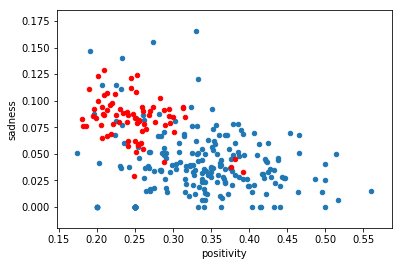

In [67]:
ax = speeches_df.plot(x='positivity', y='sadness', kind='scatter')
president_speeches_df.plot(x='positivity', y='sadness', kind='scatter', c='red', ax=ax)

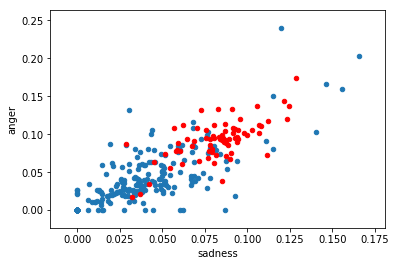

In [68]:
ax = speeches_df.plot(x='sadness', y='anger', kind='scatter')
president_speeches_df.plot(x='sadness', y='anger', kind='scatter', c='red', ax=ax)

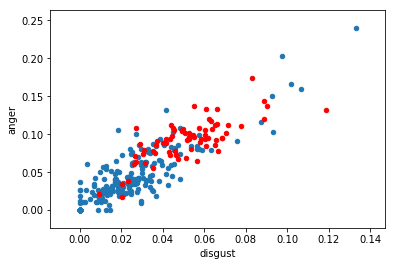

In [69]:
ax = speeches_df.plot(x='disgust', y='anger', kind='scatter')
president_speeches_df.plot(x='disgust', y='anger', kind='scatter', c='red', ax=ax)

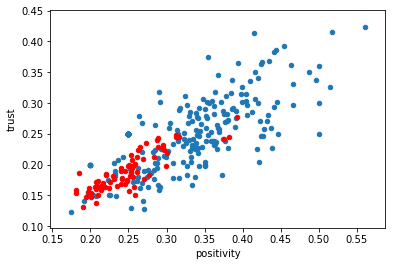

In [70]:
ax = speeches_df.plot(x='positivity', y='trust', kind='scatter')
president_speeches_df.plot(x='positivity', y='trust', kind='scatter', c='red', ax=ax)

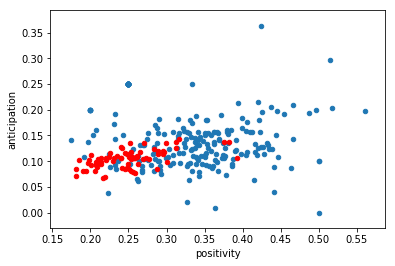

In [71]:
ax = speeches_df.plot(x='positivity', y='anticipation', kind='scatter')
president_speeches_df.plot(x='positivity', y='anticipation', kind='scatter', c='red', ax=ax)

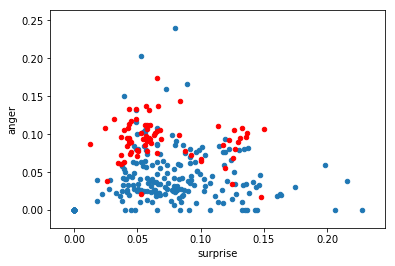

In [72]:
ax = speeches_df.plot(x='surprise', y='anger', kind='scatter')
president_speeches_df.plot(x='surprise', y='anger', kind='scatter', c='red', ax=ax)

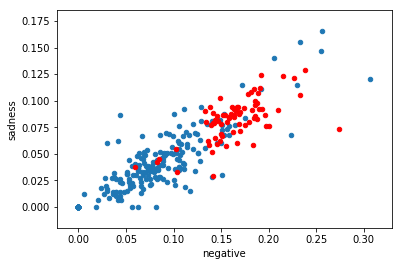

In [73]:
ax = speeches_df.plot(x='negative', y='sadness', kind='scatter')
president_speeches_df.plot(x='negative', y='sadness', kind='scatter', c='red', ax=ax)

In [74]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                         stopwords=STOPWORDS,
                         background_color='white',
                         width=1200,
                         height=1000).generate(speeches[0])

plt.imshow(wordcloud)
plt.axis('off')
plt.show()
 
wordcount_df.sum().sort_values(ascending=False).head(50)

NameError: name 'speeches' is not defined

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                         stopwords=STOPWORDS,
                         background_color='white',
                         width=1200,
                         height=1000).generate(speeches[0])

plt.imshow(wordcloud)
plt.axis('off')
plt.show()
 
president_speeches_df_wordcount_df.sum().sort_values(ascending=False).head(50)